<a href="https://colab.research.google.com/github/Melinnaaa/ADA-Informes/blob/main/Informe10_Knapsack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de la mochila**


Entrada: Dos arreglos de n elementos: $p=\left<p_1,p_2,...,p_n\right>$,  $wh=\left<wh_1,wh_2,...,wh_n\right>$. En donde el arreglo $p$ corresponde al valor de los objetos y el arreglo $wh$ al peso de los objetos. 

Por ultimo recibe una variable $w$, la cual es el peso total que soporta la mochila. 

Salida: La ganancia máxima obtenida.

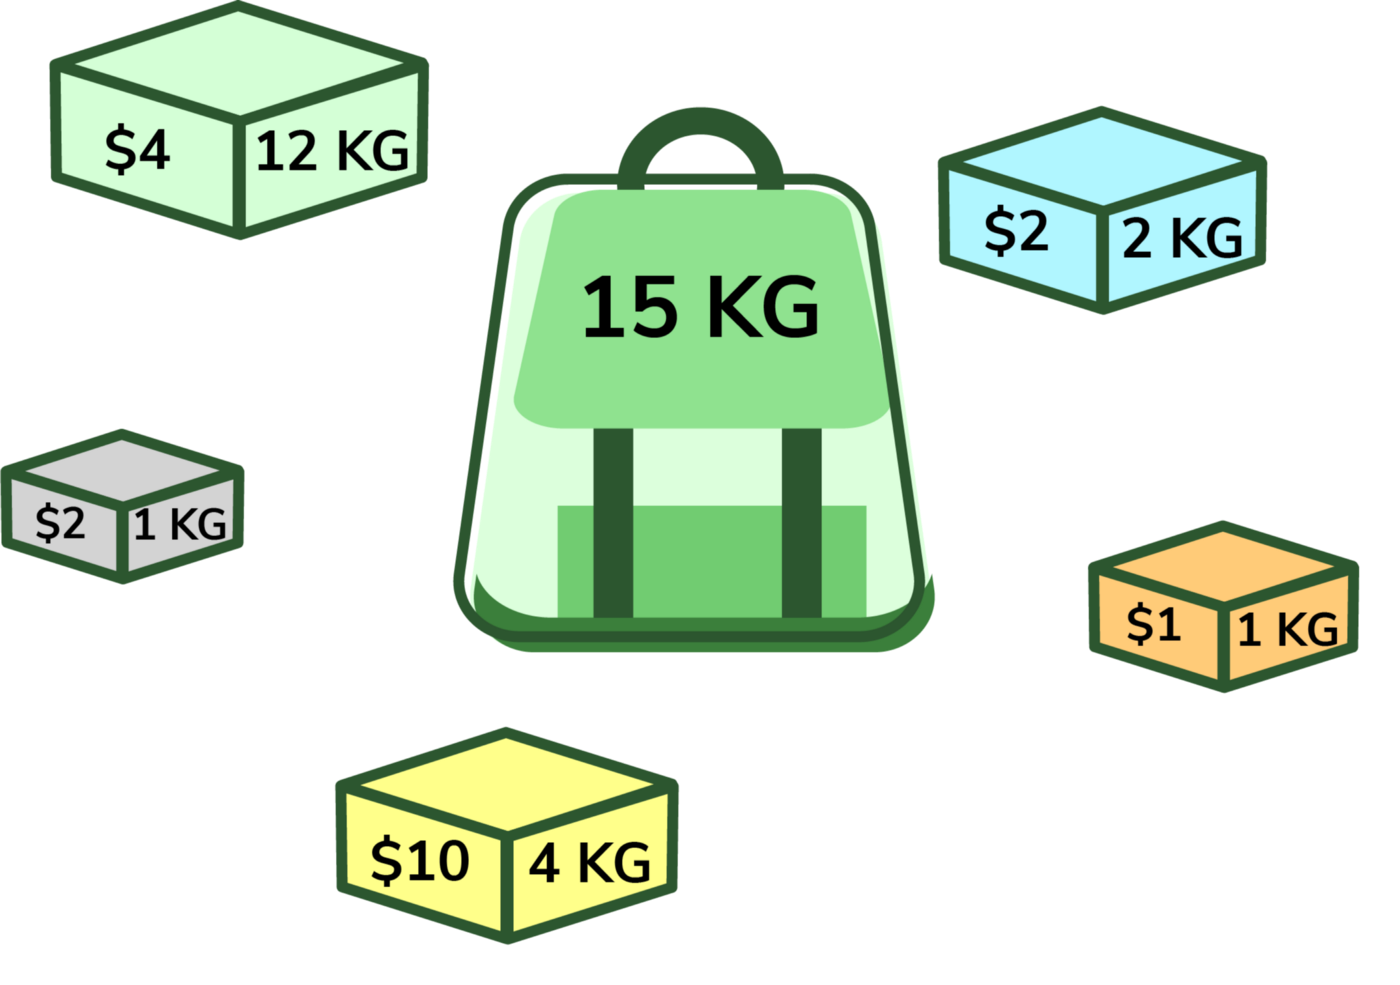

Para ponernos en contexto pensemos en un ladron que va a robar a una tienda, en donde existen una cierta cantidad de objetos, el ladron posee una mochila con un peso máximo. ¿Cómo podemos máximizar la ganancia?

Aquí es donde entra el algoritmo **Knapsack**, el cual busca máximizar la ganancia de objetos que poseen un peso y precio, a partir de una mochila que soporta una determinada cantidad de peso. 

# **2. KnapSack**

## 2.1 Código

Los siguientes códigos muestran implementaciónes del algoritmo **KnapSack.**

### Impresora de matrices

In [ ]:
from termcolor import colored
def Mostrar(matriz, m):
    print(f"La tabla obtenida fue la siguiente:")
    for fila in matriz:
        for valor in fila:
          if (valor != 0 and valor != m):
            print("\t", colored(valor, 'blue'), end=" ")
          elif (valor == m):
            print("\t",colored(valor, 'red'), end=" ")
          else:
            print("\t",colored(valor, 'magenta'), end=" ")
        print()


### KnapSack **Dinámico**

In [ ]:
import numpy as np
from termcolor import colored
# w es el peso que soporta la mochila
# wh es el peso de cada objeto
# p es el precio de cada objeto
# n es el largo
def knapSack(w, wh, p, n, cont, verbose = False):
  # Tabla que almacena los subproblemas
  tab = [[0 for x in range(w + 1)] for x in range(n + 1)]

  # Se comienza a recorrer
  for i in range(n + 1):
    for k in range(w + 1):
      cont[0] += 1
      # Si esta en la posición 0, es un objeto nulo, por lo que se inicializa en 0
      if (i == 0 or k == 0):
        if (verbose == True):
          print(f"Nos encontramos en una posición 0, por lo cual tab[{i}][{k}] = 0\n")
        tab[i][k] = 0
      # Si el peso actual es menor o igual, se puede considerar la solución del
      # caso anterior o la solución del caso sub-pasado + el valor a agregar.
      elif (wh[i-1] <= k):
        if (verbose == True):
          print(f"Obteniendo el valor máximo entre: {colored(p[i-1] + tab[i-1][k-wh[i-1]], 'magenta')} y {colored(tab[i-1][k], 'magenta')}...")
        tab[i][k] = max(p[i-1] + tab[i-1][k-wh[i-1]], tab[i-1][k])
        if (verbose == True):
          print(f"El valor de tab[{i}][{k}] es {colored(tab[i][k], 'blue')}\n")
      # Si el peso actual supera la capacidad máxima se toma la solución anterior
      else:
        if (verbose == True):
          print(f"El objeto {colored(wh[i-1], 'red')} > {colored(k, 'red')} no cabe en la mochila, tomamos la solución anterior tab[{i-1}][{k}]: {colored(tab[i-1][k], 'blue')}\n")
        tab[i][k] = tab[i-1][k]
    if(verbose == True):
      print()

  if (verbose == True):
    print(f"La ganancia máxima se encuentra en tab[{n}][{w}]")
    Mostrar(tab, tab[n][w])
    print(f"La ganancia máxima es: {colored(tab[n][w], 'red')}")

  return tab[n][w]

p = [60, 100, 120]
wh = [10, 20, 30]
w = 50
n = len(p)
cont = [0]
m = knapSack(w, wh, p, n, cont)
print("El valor máximo obtenido es:", m)
print("Cantidad de subproblemas resueltos:", cont[0])

El valor máximo obtenido es: 220
Cantidad de subproblemas resueltos: 204


### KnapSack **Greedy**

In [ ]:
import math
from termcolor import colored

# Clase sacada de https://www.geeksforgeeks.org/fractional-knapsack-problem/?ref=rp
class Item:
    def __init__(self, value, weight):
        self.value = value
        self.weight = weight

def knapSackGreedy(w, wh, p, n, cont, verbose = False):
  if (verbose == True):
    print(f"Arreglo de precios: {colored(p, 'green')}")
    print(f"Arreglo de pesos: {colored(wh, 'blue')}")
    print(f"Capacidad máxima de la mochila: {colored(w, 'magenta')}\n")
  # Creamos un diccionario con clave precio y valor peso
  d = {}
  for i in range(n):
    d[p[i]] = wh[i]
  
  # Transformamos el diccionario en una tupla y los objetos son de clase Item
  d = [Item(v, k) for v, k in d.items()]
  
  # Se ordena la tupla de mayor a menor en proporcion precio/valor.
  d.sort(key=lambda x: (x.value/x.weight), reverse=True)   
 
  # Valor máximo almacenado
  m = 0

  # Recorremos todo los objetos
  for i in d:
    cont[0] += 1
    # Si el objeto cabe en la mochila
    if i.weight <= w:
      m += i.value
      w -= i.weight
      if (verbose == True):
        print(f"El objeto cabe en la mochila {i.weight} <= {w + i.weight}")
        print(f"La ganancia máxima actual es: {colored(m, 'blue')}")
        print(f"La capacidad actual de la mochila es: {colored(w, 'magenta')}\n")
    else:
      if (verbose == True):
        print(f"El objeto no cabe en la mochila {i.weight} > {w}.\n")

  # Retornamos el máximo
  if(verbose == True):
    print(f"La ganancia máxima es: {colored(m, 'red')}")
  return m

p = [60, 100, 120]
wh = [10, 20, 30]
w = 50
n = len(p)
cont = [0]
m = knapSackGreedy(w, wh, p, n, cont)
print("El valor máximo obtenido es:", m)
print("Total de iteraciones:", cont[0])

El valor máximo obtenido es: 160
Total de iteraciones: 3


## 2.2. Descripción del algoritmo

Ambos algoritmos reciben los mismos parametros de entrada:

$w$: Es el peso que soporta la mochila

$wh$: Un arreglo pesos de cada objeto.

$p$: Un arreglo precios de cada objeto.

$n$: Es el largo del arreglo de precios.

$cont$ : Contador de subproblemas(dinámico)/ Contador de iteraciones.

$verbose$ : Variable para poder visualizar el algoritmo paso a paso

### Knapsack **Dinámico**

**Subestructura óptima**

$$
m[i, p] = \left\{ 
\begin{array}{ll}
0  &\text{si} \space  i = 0 \space \lor \space p = 0 \\
m[i-1, p] &\text{si} \space  p[i] > p \\
max(m[i-1, p], m[i-1, p-p[i]] + v[i]) &\text{si} \space  p[i] \leq p \\
\end{array}
\right\}
$$


Esto quiere decir que existen 3 opciones:
1. Si esta en la posición 0, es un objeto nulo, por lo que se inicializa en 0.
2. Si el peso actual supera la capacidad máxima se toma la solución anterior.
3. Si el peso actual es menor o igual, se puede considerar la solución del caso anterior o la solución del caso sub-pasado + el valor a agregar.

**Pasos que sigue el algoritmo**

1. Crea una matriz $table$ de dimensiones $w+1$ x $n+1$, en donde $k$ son las claves y $k$ son los valores del peso hasta llegar a la capacidad máxima.

2. Se recorre la matriz y se comienzan a aplicar los siguientes casos:
  + Si estamos en la fila o columna 0, esta se inicializa con un 0
  + Si el peso del objeto es menor o igual al peso máximo que soporta la mochila pueden, se elige el valor máximo entre dos soluciones:
    * Solución anterior.
    * Solución sub-pasada + el valor del objeto a agregar.

  +  Si el peso del objeto es mayor al peso máximo se toma la solución anterior
4. Al finalizar se retorna  $table[n][w]$.


### Knapsack **Greedy**

1. Creamos un diccionario $d$, en donde:
  + key: Precio del objeto.
  + value: Peso del objeto.

2. Se crea un tupla a partir de los valores del diccionario, y cada valor de la tupla es de la clase $Item$. 

3. Se ordena la tupla de mayor a menor a partir de la proporción **valor/peso**.

3. Se crea una variable $m$ que almacena el valor máximo, esta se inicializa en 0.

3. Se recorre la tupla y comprobamos que el peso del objeto actual quepa en la mochila, de caber se le resta el peso añadido al peso total de mochila y se le suma el valor del objeto a la variable $m$, de no caber se sigue recorriendo la tupla.

5. Se retorna el valor máximo $m$.

## 2.3. Ejemplo algoritmo **greedy**


Consideremos los siguientes datos:

$p = [60, 100, 120]$

$wh = [10, 20, 30]$

$w = 50$

Primero se crea un diccionario:

$d$ = **{60:10, 100:20, 120:30}**

Creamos la tupla y la ordenamos a partir de la proporción:

Resultados proporcion precio/peso:

60/10 = 6

100/20 = 5

120/30 = 4

Por lo cual la tupla ordenada queda de la siguiente manera.

$d = [(60,10),(100,20),(120,30)]$

Ahora inicializamos la variable $m$:

$m = 0$

Se recorre la tupla:

Iteración 1:

  El objeto cabe en la mochila $10 <= 40$

  $m = m + 60$

  $w = w - 10$

  La ganancia máxima actual es: $60$

  La capacidad actual de la mochila es: $40$

Iteración 2:

  El objeto cabe en la mochila $20 <= 40$

  $m = m + 100$

  $w = w - 20$

  La ganancia máxima actual es: $160$
  
  La capacidad actual de la mochila es: $20$

Iteracion 3:

El objeto no cabe en la mochila $30 > 20$.

Por lo cual la ganancia máxima es: $160$

## 2.4. Ejecución del algoritmo paso a paso $(verbose = True)$

Utilizando la opción $verbose = True$, podemos ver lo que ocurre en cada iteración del algoritmo.

### $verbose$ algoritmo greedy.

In [ ]:
p = [60, 100, 120]
wh = [10, 20, 30]
w = 50
n = len(p)
cont = [0]
m = knapSackGreedy(w, wh, p, n, cont, verbose = True)

Arreglo de precios: [60, 100, 120]
Arreglo de pesos: [10, 20, 30]
Capacidad máxima de la mochila: 50

El objeto cabe en la mochila 10 <= 50
La ganancia máxima actual es: 60
La capacidad actual de la mochila es: 40

El objeto cabe en la mochila 20 <= 40
La ganancia máxima actual es: 160
La capacidad actual de la mochila es: 20

El objeto no cabe en la mochila 30 > 20.

La ganancia máxima es: 160


### $verbose$ algoritmo dinámico.

In [ ]:
p = [6, 10, 12]
wh = [1, 2, 3]
w = 5
n = len(p)
cont = [0]
m = knapSack(w, wh, p, n, cont, verbose = True)

Nos encontramos en una posición 0, por lo cual tab[0][0] = 0

Nos encontramos en una posición 0, por lo cual tab[0][1] = 0

Nos encontramos en una posición 0, por lo cual tab[0][2] = 0

Nos encontramos en una posición 0, por lo cual tab[0][3] = 0

Nos encontramos en una posición 0, por lo cual tab[0][4] = 0

Nos encontramos en una posición 0, por lo cual tab[0][5] = 0


Nos encontramos en una posición 0, por lo cual tab[1][0] = 0

Obteniendo el valor máximo entre: 6 y 0...
El valor de tab[1][1] es 6

Obteniendo el valor máximo entre: 6 y 0...
El valor de tab[1][2] es 6

Obteniendo el valor máximo entre: 6 y 0...
El valor de tab[1][3] es 6

Obteniendo el valor máximo entre: 6 y 0...
El valor de tab[1][4] es 6

Obteniendo el valor máximo entre: 6 y 0...
El valor de tab[1][5] es 6


Nos encontramos en una posición 0, por lo cual tab[2][0] = 0

El objeto 2 > 1 no cabe en la mochila, tomamos la solución anterior tab[1][1]: 6

Obteniendo el valor máximo entre: 10 y 6...
El valor de tab[2][2]

#**3. Tiempo de ejecución**

## **Tiempo de ejecución Greedy**

El algoritmo **KnapSack** greedy tiene un tiempo de ejecución $O(n \cdot log (n))$

### Prueba del teorema

Ordenar los valores de mayor a menor tiene un costo de $O(n \cdot log (n))$, ya que se utiliza **QuickSort**.

Por otro lado obtener la solución óptima tiene un costo de $O(n)$.

Por lo que la cota asintótica del algoritmo 0-1 greedy es $O(n \cdot log (n))$.

## **Tiempo de ejecución Programación Dinámica**

El algoritmo **KnapSack** dinámico tiene un tiempo de ejecución $O(n \cdot w)$.

**Prueba del teorema**:

Es sabido que el tiempo de ejecución de un algoritmo de
programación está directamente relacionado con la resolución de subproblemas y el tiempo que toma resolver cada uno. Al utilizar memoización para resolver el
problema actual en base a los subproblemas se sabe que el costo de resolver un (sub-problema) es constante $O(1)$ y que cada subproblema se resuelve una única vez. De esto se obtiene que 

$$
T(n, m) = O(1) \cdot C(n, m)
$$

Siendo $C(n, m)$ la cantidad de subproblemas a resolver.

Para cada elemento en el rango $1..n$ el peso puede variar en el rango $1..m$, de forma que

$$
C(n,m)=nm
$$

Por lo que $T(n, m) = O(n \cdot m)$.

# **4. Correctitud**

## KnapSack **Dinámico** 

**Hipótesis**: El algoritmo retorna una ganancia optima correctamente.

Casos base: $P[0,j] \lor P[i,0]$ tamaño de mochila cero o ausencia de elementos, se resuelve un subproblema de tamaño cero con un valor cero.

El algoritmo resuelve los sub-problemas de la mochila de manera óptima de forma que la ganancia es máxima. Una vez son resueltos todos los subproblemas es posible solucionar el problema inicial $P(m,n)$

**Paso inductivo:** El algoritmo resuelve correctamente $P(m' < m, n)$ en base de los subproblemas de menor tamaño que ya han sido resueltos.

Gracias a la estructura óptima del problema se sabe que si $m'$ es correcto, $m$ también lo es.

## KnapSack **Greedy**

Hipótesis: El algoritmo **no otorga** siempre el resultado óptimo.

El algoritmo greedy agrega los objetos en un orden de mayor a menor, ordenados en base a su proporcion **precio/peso**. Por lo cual al tomar siempre una decisión **greedy**, la cual puede no ser la mejor a largo plazo conlleva a que el algoritmo no siempre entregue el valor máximo. Además, a pesar de que el algoritmo vea todas las opciones posibles este no ve todas las **combinaciones** posibles.

A continución se presenta un ejemplo demuestra la incorrectitud:

Se considera una mochila de capacidad $m=30 \space kg$ y la siguiente tabla de
elementos de entrada

|$i$|$p \space \text {(kg)}$|$v \space \text {(\$)}$|
|---|---|---|
|0|5|50|
|1|20|140|
|2|10|60|


Al utilizar un enfoque greedy, se elegirían los dos primeros elementos en el
orden descendente por el ratio, correspondiente a los dos primeros elementos,
generando una ganancia de $\$190$. Sin embargo la solución óptima a este problema consiste en la elección de los dos últimos elementos, con una ganancia óptima de $\$200$.

# **5. Experimentos.**

## **5.1. Tiempo de ejecución (Greedy vs Dinámico)**

En los siguientes gráficos se reporta el tiempo de ejecución del algoritmo **knapSack**, para su versión dinámica y greedy en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $100$. A partir de los gráficos obtenidos se realizará una comparación del rendimiento de ambas versiones.

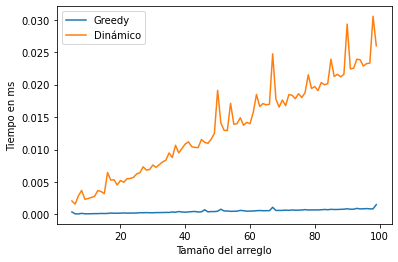

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
  
x=[]; y=[]
y1=[]
for n in range(5, 100):

  p = random.sample(range(1, 100), n)
  wh = random.sample(range(1, 100), n)
  w = 50
  cont = [0]

  t1 = repeat(setup="from __main__ import knapSackGreedy", stmt=f"knapSackGreedy({w}, {wh}, {p}, {n}, {cont})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import knapSack", stmt=f"knapSack({w}, {wh}, {p}, {n}, {cont})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Greedy", "Dinámico"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**



* Lo primero que podemos ver es que el algoritmo greedy posee un tiempo de ejecución mucho menor al dinámico lo cual hace bastante sentido, ya que $O(n \cdot m)$ > $O(n \cdot log(n))$, esto se debe a que en la mayoría de los casos $w > log(n)$ porque la mochila tiende a guardar una gran cantidad de elementos, lo que genera que el tiempo de ejecución sea mayor.

* Por otro lado, podemos notar que ambos algoritmos poseen una gráfica acorde a su tiempo de ejecuión. En donde la gráfica del **greedy** crece logaritmicamente, aunque no se logre apreciar del todo y el **dinámico** en función al tamaño de entrada por el peso de la mochila

## **5.2.Cantidad de subproblemas resueltos**

En el siguiente grafico se observa la cantidad de subproblemas que resuelve el algoritmo **KnapSack** dinámico en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $100$.

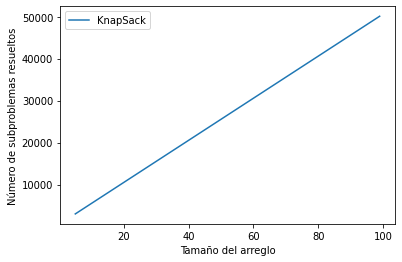

In [ ]:
x=[]; y=[]

for n in range(5,100):

  p = random.sample(range(1, 1000), n)
  wh = random.sample(range(1, 1000), n)
  w = 500
  cont = [0]
  knapSack(w, wh, p, n, cont)
  x.append(n)
  y.append(cont[0])


plt.plot(x, y)
plt.legend(["KnapSack"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Número de subproblemas resueltos')
plt.show()

### **Análisis de resultados**

* Al ver el gráfico, podemos notar que la cantidad de subproblemas resueltos depende del tamaño de entrada y la capacidad de la mochila, lo cual concuerda con el tamaño de la matriz $n \cdot w$.

* Por otro lado la cantidad de subproblemas resueltos concuerda con la la complejidad temporal del algoritmo, la cual es $O(n \cdot w)$.

## **5.3.Cantidad de Iteraciones**

En el siguiente grafico se observa la cantidad de iteraciones que realiza el algoritmo **KnapSack** greedy en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $100$.

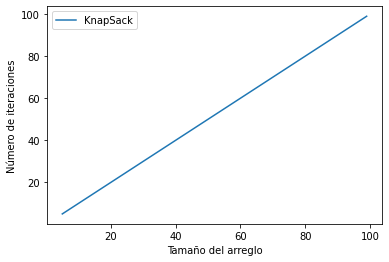

In [ ]:
x=[]; y=[]

for n in range(5,100):

  p = random.sample(range(1, 1000), n)
  wh = random.sample(range(1, 1000), n)
  w = 500
  cont = [0]
  knapSackGreedy(w, wh, p, n, cont)
  x.append(n)
  y.append(cont[0])


plt.plot(x, y)
plt.legend(["KnapSack"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Número de iteraciones')
plt.show()

### **Análisis de resultados**

* Como podemos ver la cantidad de iteraciones es lineal, y depende del tamaño del problema, ya que este itera hasta el final del diccionario creado. No como la otras implementaciones que finalizan al no caber un elemento en la mochila.

* Además, uno podría pensar que al tener una cantidad de iteraciones lineal, el algoritmo podría tener complejidad lineal de igual manera, pero al tener que ordenar todos los elementos este posea una complejidad de $O(n(log(n)))$, aunque esta se podría reducir si los elementos se ingresan ordenados, quedando una complejidad lineal de $O(n)$

## **5.4. Comparación de valores obtenidos por ambos algoritmos**

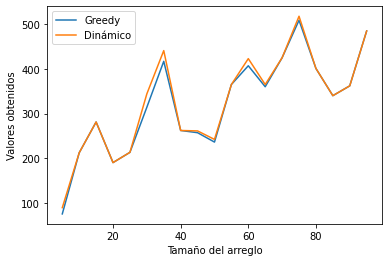

In [ ]:
x=[]; y=[]
y1 = []

for n in range(5,100, 5):

  p = random.sample(range(1, 100), n)
  wh = random.sample(range(1, 100), n)
  w = 50
  cont = [0]
  a = knapSackGreedy(w, wh, p, n, cont)
  b = knapSack(w, wh, p, n, cont)

  x.append(n)
  y.append(a)
  y1.append(b)

plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Greedy", "Dinámico"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Valores obtenidos')
plt.show()

### **Análisis de resultados**

* Podemos notar que el valor encontrado por el algoritmo greedy siempre se encuentra por debajo del algoritmo dinámico, esto se debe a que el algoritmo greedy al no realizar todas las combinaciones posibles, hay ocaciones en las que no llega al valor máximo.

* De igual manera el algoritmo greedy puede ser una buena opción si es que el valor óptimo no es el correcto, ya que este se acerca bastante al valor óptimo.

* Por ultimo, al ver el grafico queda en evidencia que el algoritmo greedy no es correcto, ya que este no siempre entrega el valor máximo.